### LJ small atom

In [2]:
import numpy as np
from bernstein_develop import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * (5/x) ** 12 - (5/x) ** 6)
def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p
params = range(-1, -15, -2)

steps_between_points = 3
configurations = 500
outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/trajectory_match/small_npt.out"
tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=15,
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

tm.prepare_training_data()
tm.fit()

x = np.linspace(5.4, 15, 10000)
y_fit = tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y) #, thermostat='NpT', output_path="/home/markjenei/polymerisation-coarse-graining/lj_test/small_npt.png")
best_params, best_weights = tm.best_subset((-7, -13), x, print_coeffs=True, plot=True)

Loading data	1.56 s
Preparing input	7.04 s
Fitting	

KeyboardInterrupt: 

Loading data	3.99 s
Preparing input	20.98 s
Fitting	200.61 s


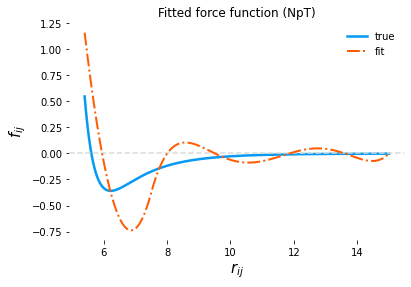

In [3]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * (5/x) ** 12 - (5/x) ** 6)

r_m, cutoff = 7.5, 15

def bernstein_basis_functions(r, p):
    global r_m, cutoff
    r = np.array(r)
    original_shape = r.shape
    r = np.ravel(r)
    y = np.zeros(r.shape[0])

    x = (r / r_m)[r < r_m]
    x1 = ((r - r_m) / (-r_m))[r < r_m]
    x2 = ((r - r_m) / (cutoff - r_m))[(r_m < r) & (r <= cutoff)]

    if p == 0:
        y[r < r_m] = (1 - x) ** 2
    elif p == 1:
        y[r < r_m] = (1 + x1) * (1 - x1)
        y[(r_m < r) & (r <= cutoff)] = (1 + 4*x2) * (1 - x2)**4
    elif p == 2:
        y[r < r_m] = -r_m * x1 * (1 - x1)
        y[(r_m < r) & (r <= cutoff)] = (cutoff - r_m) * x2 * (1 - x2)**4
    elif p == 3:
        y[(r_m < r) & (r <= cutoff)] = 10 * x2**2 * (1 - x2)**3
    elif p == 4:
        y[(r_m < r) & (r <= cutoff)] = 10 * x2**3 * (1 - x2)**2
    elif p == 5:
        y[(r_m < r) & (r <= cutoff)] =  5 * x2**4 * (1 - x2)

    return y.reshape(original_shape)

#params = [0, 1, 2, 3, 4, 5]
params = range(0, 6)
steps_between_points = 3
configurations = 1500
outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/trajectory_match/small_npt.out"
tm = TrajectoryMatching(outfile_path=outfile, basis=bernstein_basis_functions, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=15,
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

tm.prepare_training_data()
tm.fit()

x = np.linspace(5.4, 15, 10000)
y_fit = tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)